Statements versus Expressions
================

**Statement** is a **Prove-It** class.  **Statement**s wrap **Expression**s.  **Statement**s are responsible for storing and maintaining proof information relevant to that **Expression**.  Any **Expression** may be wrapped as a **Statement** with no guarantee that the **Expression** is truth-apt.  **Prove-It**, in its core, is agnostic to intrinsic truth-aptness of **Expression**s except when a **Statement** is able to be proven.  The `proveit.logic` package defines the Boolean concept which may be used for making statements of the form $A \in \mathbb{B}$ (where $\mathbb{B}$ represents the Boolean set of true or false), but this is outside **Prove-It**'s core.  As far as the core is concerned, a **Statement** is either proven or not; if it is not proven, it may or may not be truth-apt.

When an **Expression** is wrapped by a corresponding **Statement**, it is in a one-to-one correspondence.  For most practical purposes, working with a **Statement** object is the same as working with its corresponding **Expression** object.  Using Python tricks (specifically, overloading the `__getattr__` and `__dir__` methods), the **Statement** behaves in most ways as if it were the **Expression** it is wrapping.  Conversely, an **Expression** will generate and/or access its corresponding **Statement** as needed.

The purpose of working with a **Statement** object directly is in the way that it is displayed.  When the **Statement** has been proven, under some set of assumptions (or no assumptions), the **Statement** is displayed in a way that portrays this information.  If the **Statement** has not been proven (within the Python session's memory), the normal **Expression** display will be shown.  If it has been proven most recently under some set of assumptions, ${\cal A}$, it is display in the form ${\cal A} \boldsymbol{\vdash} S$ (or simply $\boldsymbol{\vdash} S$ if ${\cal A}$ is empty), where $S$ is the **Statement**/**Expression**.  This bolded single turnstyle $\boldsymbol{\vdash}$ is **Prove-It**'s indication that the **Statement** on the right is derivable from the assumptions on the left.  If one wishes to make **Prove-It** **Expression**s that use this $\vdash$ operator symbol, it can be left un-bolded to distinguish it from $\boldsymbol{\vdash}$.

In [1]:
# For example,
from proveit.common import fx
fxStatement = fx.proven(assumptions={fx})
fxStatement

The `proven` method attempts to prove the **Statement** (corresponding to the **Expression**) under the given set of assumptions and returns the **Statement** object if it is successful.  In this case, $f(x)$ is trivially true if we use $f(x)$ as an assumption.  Again, **Prove-It** is agnostic to whether or not $f(x)$ is truth-apt.  This simply says that if $f(x)$ is assumped to be a true statement, then $f(x)$ is a true statement.  If `proven` is not successful, it raises a `ProofFailure` exception.

In [2]:
from proveit import ProofFailure
try:
    fx.proven()
except ProofFailure as e:
    print "EXPECTED ERROR: ", e

EXPECTED ERROR:  Proof failed: f( x ) assuming {}


To obtain the **Expression** from the **Statement**, and be able to display it as the **Expression** only, call the `expr` method:

In [3]:
fxStatement.expr()

But note that we may use the **Statement** object as if it were the **Expression** object for most practical purposes.  It aquires all of the **Expression**'s attributes, except for some that it has overridden (such as `__class__`, `latex`, and `string`).

In [4]:
print dir(fxStatement)

['__doc__', '__eq__', '__hash__', '__init__', '__module__', '__ne__', '__repr__', '__str__', '_conclusionOfImplication', '_config_latex_tool', '_coreInfo', '_expression', '_generalizations', '_generalizers', '_generate_png', '_hypothesisOfImplication', '_implicationsOfHypothesis', '_implicators', '_isAxiom', '_isNamedTheorem', '_latestProvingAssumptions', '_name', '_package', '_proofNumber', '_prover', '_pv_it_filename', '_repr_png_', '_restrictionChecked', '_specializations', '_specialize_or_relabel', '_specializers', '_subExpressions', '_unique_id', '_unique_rep', '_validateRelabelMap', 'beginProof', 'exprInfo', 'expr_to_prove', 'formatted', 'freeMultiVars', 'freeVars', 'generalize', 'isProven', 'latex', 'make', 'operands', 'operator', 'operatorOfOperation', 'png', 'prove', 'proveByEval', 'proven', 'qed', 'relabel', 'relabeled', 'safeDummyVar', 'safeDummyVars', 'specialize', 'statement', 'string', 'subExprIter', 'substituted', 'unique_id_map', 'usedVars', 'wasProven']


In [5]:
fxStatement.operands

In [6]:
fxStatement.__class__ # this is a giveaway that it is not an Expression

<class proveit._core_.statement.Statement at 0x10aa83a10>

In [7]:
fxStatement.expr().__class__ # here it is

<class proveit._core_.expression.operation.Operation at 0x10a6136d0>

### Displaying proofs

To display the proof derivation, as a DAG (directed, acyclic graph), call the `proof` method of the **Statement** object.

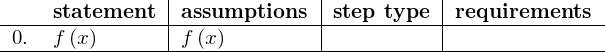

In [8]:
fxStatement.proof()

This is a trivial example.  In the next three tutorial notebooks, we will be examining the different kinds of derivation steps for making proofs and we will see more examples of proven **Statements** and displaying more interesting proofs.  For now, we simply note that this display is similar to the way that the **Expression** DAG is displayed using `exprInfo`.  The "root" node is the **Statement** that is proven and is indexed as `0`.  In general, with exception to trivial examples like this one, it will have requirements supplied as a list of other indices (similarly to the **sub-expressions** in `exprInfo`).

### Default assumptions

If you do not supply the `proven` method with a set of assumptions, it will use `proveit._core_.defaults_and_settings.defaults.assumptions` (aliased as `proveit.defaults.assumptions`).  By default, this "default" is the empty set, but it can be changed for convenience.

In [9]:
from proveit import defaults
defaults.assumptions = {fx}
fx.proven()

### Storing expression images

If you try running any of these IPython notebook tutorials yourself, you should notice that it takes much longer the first time than subsequent times.  The bottleneck for these examples is simply compiling LaTeX into png images.  The first time this is done for any **Expression**, **Statement**, **ExpressionInfo** (from calling the `exprInfo` method), or **Prover** (from calling the `proof` method), the images are stored to the disk for any future needs.

By default, the information is stored in a `.pv_it` folder in the current directory.  This default can be changed by accessing `proveit._core_.defaults_and_settings.storage` (aliased as `proveit.storage`).  The storage requirements are not substantial, so there should not be any need to change this default typically.  Feel free to skip the rest of this section if you do not anticipate needing to alter this default and you are not concerned about the clutter from this storage.

In [10]:
# But if you want to turn off this storage, you can.
from proveit import storage
from proveit.common import gy
storage.directory = None
gy # not retrieved or placed into storage (this take extra time generate the image)

In [11]:
# Or you can use an alternative storage directory
import os
try:
    os.mkdir('test_storage')
except:
    pass
storage.directory = 'test_storage'
from proveit.common import Px
Px

In [12]:
# You can see that it did store some things in the '.pv_it' folder of this new directory.
# These are stored by hash values with collision protection (collision are astronomically
# unlikely at these hash string lengths, but it never hurts to be on the safe side).
os.listdir(os.path.join('test_storage', '.pv_it')) 

['2a9e303518f1196ce252c7dd18e87a9873d2a523',
 '7de344579b991697b85106fc0bd595cb5ed4c24f',
 'bf0e28d9489ec6c57b070e40ff70ce9660aa6480',
 'e155a8e7c621eb7073a367e5cc58abc0fb4cab5e']

In [13]:
# You can also clear the storage if you wish:
storage.clear() # or equivalent just delete the '.pv_it' folder.

In [14]:
try:
    os.listdir(os.path.join('test_storage', '.pv_it')) 
except OSError as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: [Errno 2] No such file or directory: 'test_storage/.pv_it'


The only consequence is that it will need to regenerate the images next time (it is still stored in memory for this IPython session):

In [15]:
# it is still stored in memory as the png attribute
if Px.png is not None:
    print "png is stored"
Px

png is stored


In [16]:
os.rmdir('test_storage') # let's delete this test storage directory now